# Trabalho de Ciencia de dados

# Importando libs

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# import scikit-learn modules
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Lendo dataset

[Dataset](https://basedosdados.org/dataset/climate-action-tracker-cat)

In [54]:
pathDataset = '/content/sample_data/CAT_new_portal_data_05_2022.csv'

data = pd.read_csv(pathDataset)

data.dropna()

,sector,indicator,country,year,variable,value,unit
0,Agriculture,Agriculture activity (meat): consumption,ID,2020,projected_current_policy_min,76.640000,meat kcal / cap / day
1,Agriculture,Agriculture activity (meat): consumption,ID,2025,projected_current_policy_min,81.110000,meat kcal / cap / day
2,Agriculture,Agriculture activity (meat): consumption,ID,2020,projected_current_policy_max,76.640000,meat kcal / cap / day
3,Agriculture,Agriculture activity (meat): consumption,ID,2025,projected_current_policy_max,81.110000,meat kcal / cap / day
4,Agriculture,Agriculture activity (meat): production,ID,2020,projected_current_policy_min,0.039300,meat kg / cap / day
...,...,...,...,...,...,...,...
41621,Transport Road,EV stock shares,SA,2050,projected_current_policy_min,48.737591,%
41622,Transport Road,EV stock shares,SG,2050,projected_current_policy_min,68.196849,%
41623,Transport Road,EV stock shares,UA,2050,projected_current_policy_min,51.839816,%
41624,Transport Road,EV stock shares,US,2050,projected_current_policy_min,63.852742,%


# Analisando dataset

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41626 entries, 0 to 41625
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sector     41626 non-null  object 
 1   indicator  41626 non-null  object 
 2   country    41626 non-null  object 
 3   year       41626 non-null  int64  
 4   variable   41626 non-null  object 
 5   value      41626 non-null  float64
 6   unit       41626 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.2+ MB


Unidades

In [56]:
data['unit'].unique()

array(['meat kcal / cap / day', 'meat kg / cap / day', 'kcal / cap / day',
       'tCO2e / thsd. USD2012 (PPP)', 'm2 / cap', 't CO2 / cap',
       'kg CO2 / m2', 'kWh / m2', '% / year', 'm² / cap', 'kg CO2 / m²',
       'kWh / cap', 'gCO2 / kWh', '% renewables',
       '1990 value normalised to 1', '%', 'GW', 'TW',
       '% of coal in electricity generation', '% ',
       'ha of forest (indexed to 1990)', 't product / cap',
       'kg CO2 / t product', '% coal', 'tCO2 / thsd. USD2012 (PPP)',
       'tCO2 / thsd. USD2012 (MER)', 'tCO2e / cap', 'GJ (primary) / cap',
       'GJ (final) / cap', 'thoUSnd USD2012 (PPP) / cap',
       'TJ (primary) / mln. USD2012 (PPP)',
       'TJ (final) / mln. USD2012 (PPP)', 'tCO2 / TJ (primary)',
       '% fossil fuels', 'Mt CO2e ', 'million people', 'Mt CO2e',
       't CO2 / TJ (primary)', 'thousand USD2012 (PPP) / cap',
       'Mt CO2e (/capita)', 'Mtoe', 'tCO2e / ktoe', 'g / pkm',
       'pkm / cap', '% biofuels or electric.', '% biofuels/elec.',
  

# Manipulando dados 


Separando a emissão de kg CO2 / m² no Brasil

In [57]:
brazilData = data.loc[data['country'] == 'BR']
brazilDataEmission = brazilData.loc[brazilData['unit'] == 'kg CO2 / m2']

In [58]:
brazilDataEmission

,sector,indicator,country,year,variable,value,unit
5079,Buildings,"Buildings emissions intensity (per floor area,...",BR,2005,historic,10.000000,kg CO2 / m2
5080,Buildings,"Buildings emissions intensity (per floor area,...",BR,2006,historic,9.000000,kg CO2 / m2
5081,Buildings,"Buildings emissions intensity (per floor area,...",BR,2007,historic,9.000000,kg CO2 / m2
5082,Buildings,"Buildings emissions intensity (per floor area,...",BR,2008,historic,10.000000,kg CO2 / m2
5083,Buildings,"Buildings emissions intensity (per floor area,...",BR,2009,historic,7.000000,kg CO2 / m2
...,...,...,...,...,...,...,...
6183,Buildings,"Buildings emissions intensity (per floor area,...",BR,2040,benchmark_max,0.000000,kg CO2 / m2
6184,Buildings,"Buildings emissions intensity (per floor area,...",BR,2050,benchmark_max,0.000000,kg CO2 / m2
6185,Buildings,"Buildings emissions intensity (per floor area,...",BR,2030,benchmark_max,4.707588,kg CO2 / m2
6186,Buildings,"Buildings emissions intensity (per floor area,...",BR,2040,benchmark_max,1.883035,kg CO2 / m2


# Taxa de transmissão de co2 por m² em relação aos paises


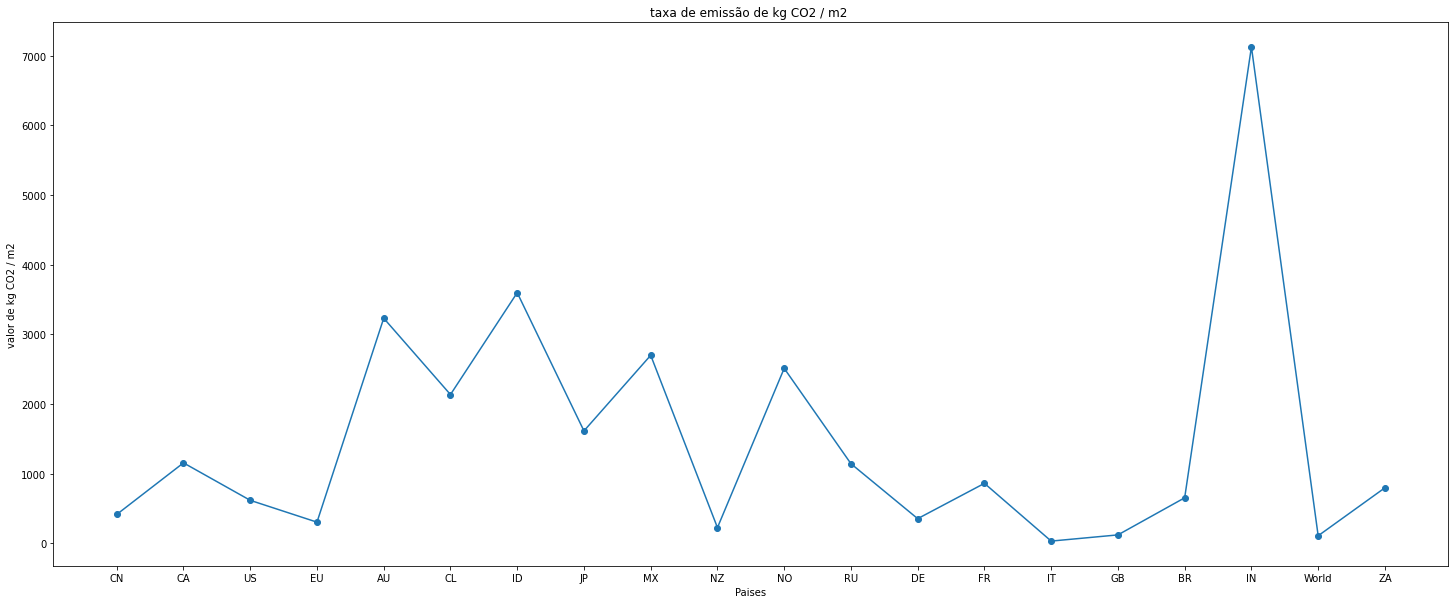

In [71]:
plt.figure(figsize=(25, 10))

emissonData = data.loc[data['unit'] == 'kg CO2 / m2']

values = emissonData.groupby('country')['value'].sum()

plt.title('taxa de emissão de kg CO2 / m2 ')
plt.xlabel('Paises')
plt.ylabel('emissão de kg CO2 / m2')
plt.scatter(emissonData['country'].unique(),values)
plt.plot( emissonData['country'].unique(),values)

# Previsão com regressão linear na taxa de emissão de co2/m² no Brasil 

In [60]:
X = brazilDataEmission.loc[:, brazilDataEmission.columns.intersection(['year'])]
y = brazilDataEmission['value']

Separando as variaveis de treino e de test.

In [62]:
Xtrain, XTest, ytrain, yTest = train_test_split(X,y, test_size=0.3, random_state=0)
print(Xtrain.shape, XTest.shape, ytrain.shape, yTest.shape)

(57, 1) (25, 1) (57,) (25,)


Treinando modelo a partir dos dados de treino

In [63]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

Prevendo dados de teste

In [64]:
dataPredict = model.predict(XTest)

Fazendo a acuracia dos dados previstos

In [65]:
absolute_error = mean_absolute_error(yTest,dataPredict)
print(f"Acurácia de Teste: ± {absolute_error:1.0f}")

Acurácia de Teste: ± 10


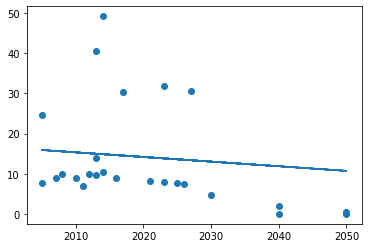

In [66]:
#plt.xlabel('setor')
#plt.ylabel('valor de consumo')
plt.scatter(XTest,yTest)
plt.plot(XTest,dataPredict)